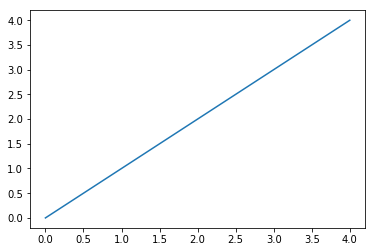

In [1]:
import math as math
import numpy as np
import matplotlib.pyplot as pyplot
%matplotlib inline
x = np.arange(5)
pyplot.plot(x)

In [3]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

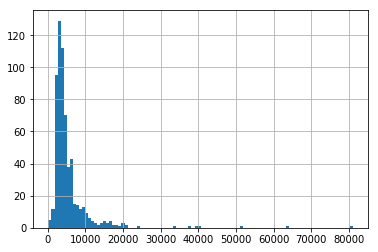

In [5]:
df['ApplicantIncome'].hist(bins=100)

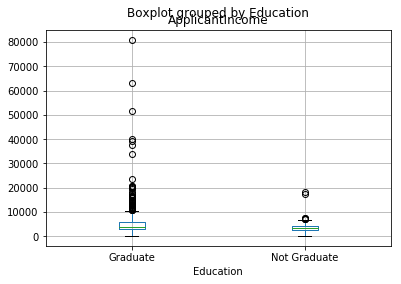

In [38]:
df.boxplot(column='ApplicantIncome', by='Education')

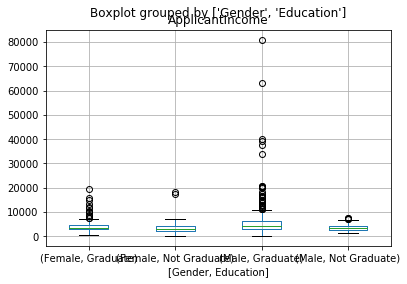

In [7]:
df.boxplot(column='ApplicantIncome', by=['Gender', 'Education'])

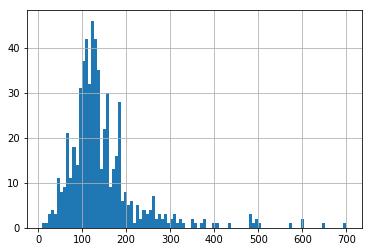

In [8]:
df['LoanAmount'].hist(bins=100)

In [9]:
temp1 = df['Credit_History'].value_counts(ascending=False)
temp2 = df.pivot_table(values='Loan_Status',index=['Property_Area'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
temp2

,Loan_Status
Property_Area,
Rural,0.614525
Semiurban,0.768240
Urban,0.658416


In [11]:
df_test = pd.read_csv("test.csv")
df_test = df_test[['Loan_ID', 'Credit_History']]
df_test = df_test.fillna(value=0, axis=1)
df_test['Credit_History'] = df_test['Credit_History'].map({1.0: 'Y', 0.0:'N'})
df_test = df_test.rename(columns={'Credit_History': 'Loan_Status'})
df_test = df_test.set_index(['Loan_ID'])
df_test.to_csv('out.csv')

In [54]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [12]:
df['Self_Employed'].fillna('No',inplace=True)
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

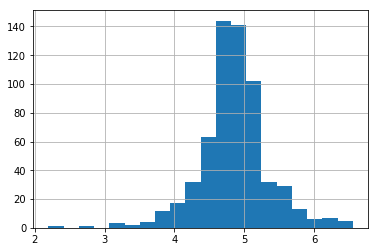

In [23]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

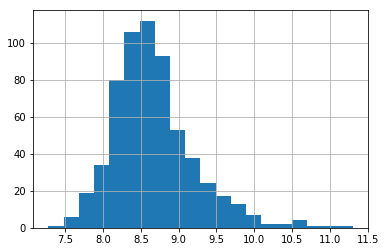

In [24]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

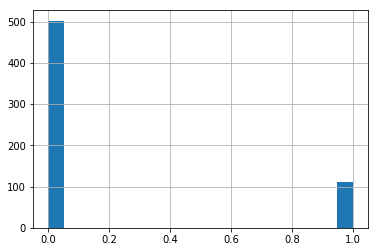

In [32]:
df['Gender'].fillna(0, inplace=True)
df['Gender'].hist(bins=20)

In [57]:
# df['Married'].replace({'Yes':1, 'No':0}, inplace=True)
df['Married'].fillna(1, inplace=True)

0

In [62]:
df['Dependents'].value_counts()
# df['Dependents'].hist()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [85]:
import numpy as np

import matplotlib as plt

from sklearn import datasets

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

dataset = datasets.load_iris()
model = LogisticRegression(C=1e5)
model.fit(dataset.data, dataset.target)

expected = dataset.target

predicted = model.predict(dataset.data)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
iris_df = pd.DataFrame(np.c_[dataset.data, dataset.target], columns=dataset.feature_names+['target'])
print(iris_df['target'].value_counts())

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.96      0.97        50
          2       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150

[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]
2.0    50
1.0    50
0.0    50
Name: target, dtype: int64
